In [11]:
# Load the packages you intend to work with every time you start a new session
library(tseries)
library(TSA)
library(forecast)

Loading required package: leaps
Loading required package: locfit
locfit 1.5-9.1 	 2013-03-22
Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-12. For overview type 'help("mgcv-package")'.

Attaching package: ‘TSA’

The following objects are masked from ‘package:stats’:

    acf, arima

The following object is masked from ‘package:utils’:

    tar

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate

Attaching package: ‘timeDate’

The following objects are masked from ‘package:TSA’:

    kurtosis, skewness

This is forecast 7.1 


Attaching package: ‘forecast’

The following objects are masked from ‘package:TSA’:

    fitted.Arima, plot.Arima

The following object is masked from ‘package:nlme’:

    getResponse



In [4]:
ndvi <- read.csv("http://www.escet.urjc.es/biodiversos/R/ndvi.csv", header=T, sep="\t")

In [5]:
head(ndvi)

,year,juldays,X1,X2,X3,X4,X5
1,2000.0000,2000049.0000,0.5732,0.6348,0.5495,0.5583,0.6459
2,2000.0000,2000065.0000,0.5867,0.6238,0.5495,0.5588,0.5482
3,2000.0000,2000081.0000,0.5703,0.5854,0.5289,0.5172,0.5309
4,2000.0000,2000097.0000,0.5720,0.5990,0.5374,0.5047,0.5877
5,2000.0000,2000113.0000,0.5737,0.5815,0.5813,0.5637,0.5370
6,2000.0000,2000129.0000,0.6365,0.5786,0.5130,0.5257,0.5275


In [6]:
str(ndvi)

'data.frame':	201 obs. of  7 variables:
 $ year   : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 2000 ...
 $ juldays: int  2000049 2000065 2000081 2000097 2000113 2000129 2000145 2000161 2000177 2000193 ...
 $ X1     : num  0.573 0.587 0.57 0.572 0.574 ...
 $ X2     : num  0.635 0.624 0.585 0.599 0.582 ...
 $ X3     : num  0.549 0.549 0.529 0.537 0.581 ...
 $ X4     : num  0.558 0.559 0.517 0.505 0.564 ...
 $ X5     : num  0.646 0.548 0.531 0.588 0.537 ...


In [7]:
class(ndvi)

[1] "data.frame"

In [27]:
head(ndvi[,-1]) # all columns except for the first

,juldays,X1,X2,X3,X4,X5
1,2000049.0000,0.5732,0.6348,0.5495,0.5583,0.6459
2,2000065.0000,0.5867,0.6238,0.5495,0.5588,0.5482
3,2000081.0000,0.5703,0.5854,0.5289,0.5172,0.5309
4,2000097.0000,0.5720,0.5990,0.5374,0.5047,0.5877
5,2000113.0000,0.5737,0.5815,0.5813,0.5637,0.5370
6,2000129.0000,0.6365,0.5786,0.5130,0.5257,0.5275


In [41]:
table(ndvi$year) # 3 missing vals at beginning and end


2000 2001 2002 2003 2004 2005 2006 2007 2008 
  20   23   23   23   23   23   23   23   20 

In [42]:
# 23 observations per year (except for the first and last year)
ndvi.ts <- ts(ndvi[,3:7], start=c(2000, 4), frequency=23)

In [36]:
dim(ndvi)

[1] 201   7

In [43]:
dim(ndvi.ts)

[1] 201   5

In [47]:
class(ndvi.ts) # it's a multivariate time series (mts)

[1] "mts"    "ts"     "matrix"

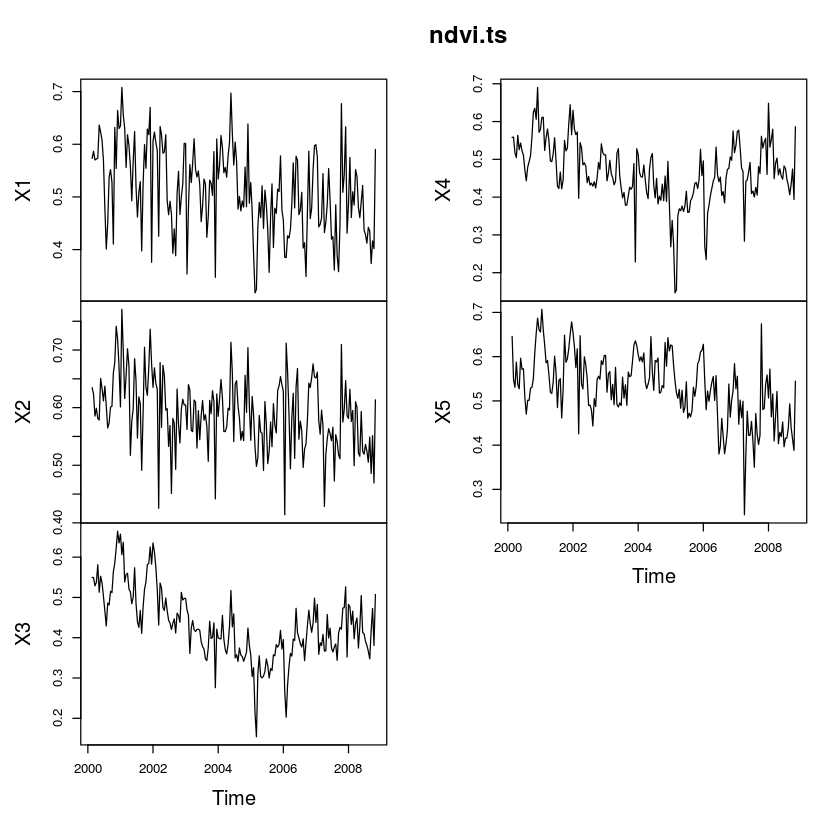

In [50]:
plot(ndvi.ts)

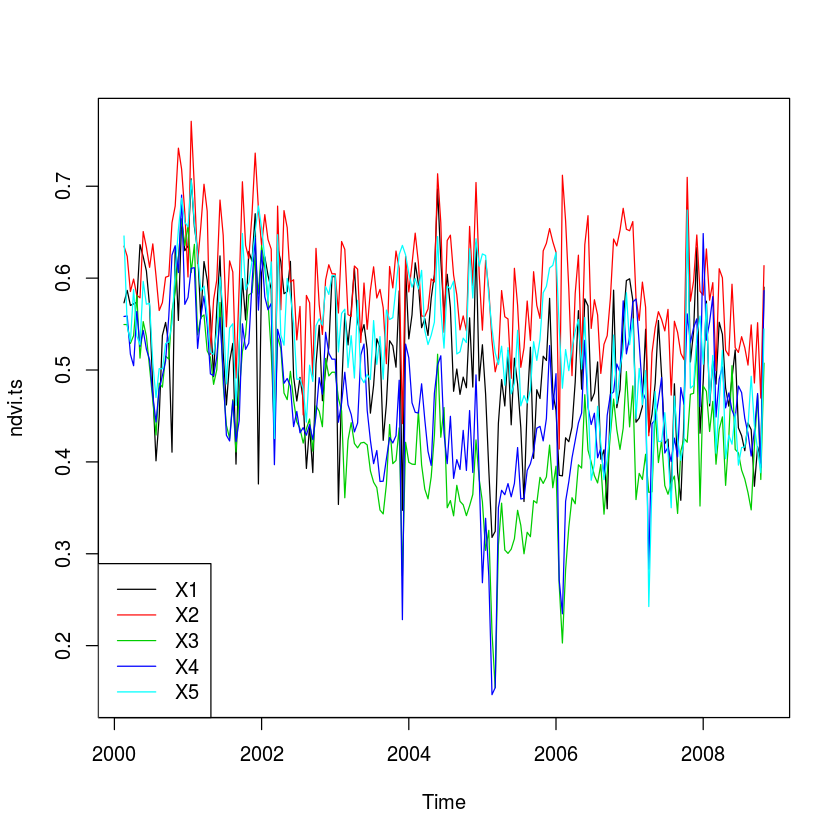

In [53]:
# all time series in one plot w/ different colors
plot(ndvi.ts, plot.type = "single", col=1:5)
# add a legend w/ solid line type
legend("bottomleft", lty=rep(1,5), col=1:5, legend=paste("X", 1:5, sep=""))

In [44]:
# strptime(ndvi$year, format="%Y")